In [25]:
import os
import pandas as pd
%matplotlib inline

In [26]:
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [27]:
# Read your api key environment variable
api_key = os.getenv("NEWSAPI_KEY")

In [28]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [29]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_articles['totalResults']

3573

In [76]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language="en")
ethereum_articles["totalResults"]

NewsAPIException: {'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 500 requests over a 24 hour period (250 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.'}

In [31]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-05-16,J.K. Rowling has been drinking a lot and you'd...,0.7650,0.171,0.000,0.829
1,2020-05-08,"Yesterday, the prominent bitcoin investor Mich...",0.3182,0.067,0.000,0.933
2,2020-04-30,"Two years ago, the venture firm Andreessen Hor...",0.2732,0.081,0.051,0.867
3,2020-05-08,"Early next week, Bitcoin is about to experienc...",0.2716,0.061,0.000,0.939
4,2020-05-13,Over the last few weeks all eyes in the crypto...,0.0000,0.000,0.000,1.000


In [32]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2020-05-20,Editors note:Andreessen Horowitzs Crypto Start...,0.0000,0.000,0.000,1.000
1,2020-04-30,"Two years ago, the venture firm Andreessen Hor...",0.2732,0.081,0.051,0.867
2,2020-05-14,Use this to send Ether from one account to ano...,0.6249,0.141,0.000,0.859
3,2020-05-24,"Some open-source groups, such as The Linux Fou...",-0.4457,0.031,0.086,0.882
4,2020-05-12,With unemployment surging and businesses strug...,0.0000,0.148,0.148,0.703


In [33]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.312379,0.078211,0.020579,0.901158
std,0.367924,0.048394,0.038628,0.041086
min,-0.585900,0.000000,0.000000,0.812000
25%,0.174400,0.063500,0.000000,0.878000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.025500,0.910000
max,0.801600,0.188000,0.134000,1.000000


In [34]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.206312,0.087412,0.031765,0.880647
std,0.372442,0.080910,0.045195,0.094398
min,-0.445700,0.000000,0.000000,0.703000
25%,0.000000,0.031000,0.000000,0.845000
50%,0.077200,0.067000,0.000000,0.879000
75%,0.571900,0.141000,0.058000,0.943000
max,0.848100,0.260000,0.148000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [35]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, reuters
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('reuters')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/collinpixley/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/collinpixley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# Expand the default stopwords list if necessary
# bitcoin = reuters.raw(fileids=reuters.fileids(categories='money-fx')[0])
# ethereum = reuters.raw(fileids=reuters.fileids(categories='money-fx')[0])
# fileids=reuters.fileids(categories='money-fx')
# ids = reuters.fileids(categories="money-fx")
# corpus = [reuters.raw(i) for i in ids if "bitcoin" in reuters.raw(i).lower()]
# print(corpus)
# sw_addons = []

In [37]:
# Complete the tokenizer function
def tokenizer(row):
    """Tokenizes text."""
    text = row["text"]
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Remove the stop words
    sw = set(stopwords.words('english'))
    # Lemmatize Words into root words
    tokens = [word.lower() for word in words if word.lower() not in sw]
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in tokens]
    return lem


In [61]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df.apply(tokenizer, axis = 1)
bitcoin_df = bitcoin_df[["date", "compound", "positive", "negative", "neutral", "text", "tokens"]]
bitcoin_df.head()


,date,compound,positive,negative,neutral,text,tokens
0,2020-05-16,0.7650,0.171,0.000,0.829,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, drinking, lot, youd, better, bel..."
1,2020-05-08,0.3182,0.067,0.000,0.933,"Yesterday, the prominent bitcoin investor Mich...","[yesterday, prominent, bitcoin, investor, mich..."
2,2020-04-30,0.2732,0.081,0.051,0.867,"Two years ago, the venture firm Andreessen Hor...","[two, year, ago, venture, firm, andreessen, ho..."
3,2020-05-08,0.2716,0.061,0.000,0.939,"Early next week, Bitcoin is about to experienc...","[early, next, week, bitcoin, experience, third..."
4,2020-05-13,0.0000,0.000,0.000,1.000,Over the last few weeks all eyes in the crypto...,"[last, week, eye, crypto, world, glued, halven..."


In [62]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df.apply(tokenizer, axis = 1)
ethereum_df = ethereum_df[["date", "compound", "positive", "negative", "neutral", "text", "tokens"]]
ethereum_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2020-05-20,0.0000,0.000,0.000,1.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, noteandreessen, horowitz, crypto, sta..."
1,2020-04-30,0.2732,0.081,0.051,0.867,"Two years ago, the venture firm Andreessen Hor...","[two, year, ago, venture, firm, andreessen, ho..."
2,2020-05-14,0.6249,0.141,0.000,0.859,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
3,2020-05-24,-0.4457,0.031,0.086,0.882,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."
4,2020-05-12,0.0000,0.148,0.148,0.703,With unemployment surging and businesses strug...,"[unemployment, surging, business, struggling, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [151]:
from collections import Counter
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk

In [246]:
sw_addons = set(['char', 'ha', 'bitcoinnotedterf', 'wa', 'fucking', 'another', 'btc', 'bitcoin', 'going', 'daywelcome', 'another', 'nakaboto', 'un', 'Satoshi Nakaboto'])

In [247]:
btc_big_string = ' '.join([article['content'] for article in bitcoin_articles['articles'] if article['content']])


In [248]:
lemmatizer = WordNetLemmatizer()
def process_text(doc):
    sw = set(stopwords.words('english'))
    sw = sw.union(sw_addons)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [249]:
btc_processed = process_text(btc_big_string)
print(btc_processed)

['jk', 'rowling', 'drinking', 'lot', 'youd', 'better', 'believe', 'thought', 'author', 'cuckoos', 'calling', 'rowlingdecided', 'friday', 'perfect', 'time', 'learn', 'yesterday', 'prominent', 'investor', 'michael', 'terpin', 'announced', 'hed', 'filed', 'suit', 'ringleader', 'sim', 'swap', 'gang', 'hed', 'chasing', 'since', 'following', 'theft', 'roughly', 'two', 'year', 'ago', 'venture', 'firm', 'andreessen', 'horowitz', 'az', 'took', 'wrap', 'dedicated', 'crypto', 'fund', 'subset', 'limited', 'partner', 'whod', 'provided', 'firm', 'million', 'capital', 'commit', 'early', 'next', 'week', 'experience', 'thirdever', 'halving', 'hugely', 'important', 'event', 'could', 'shift', 'balance', 'power', 'within', 'network', 'historically', 'event', 'also', 'called', 'halv', 'last', 'week', 'eye', 'crypto', 'world', 'glued', 'halvening', 'nighreligious', 'moment', 'blockchain', 'realm', 'every', 'amount', 'new', 'mined', 'distri', 'since', 'first', 'block', 'generated', 'back', 'three', 'halving'

In [250]:
eth_big_string = ' '.join([article['content'] for article in ethereum_articles['articles'] if article['content']])

In [251]:
eth_processed = process_text(eth_big_string)
print(eth_processed)

['editors', 'noteandreessen', 'horowitzs', 'crypto', 'startup', 'school', 'brought', 'together', 'participant', 'around', 'us', 'overseas', 'sevenweek', 'course', 'learn', 'build', 'crypto', 'company', 'andreessen', 'ho', 'two', 'year', 'ago', 'venture', 'firm', 'andreessen', 'horowitz', 'az', 'took', 'wrap', 'dedicated', 'crypto', 'fund', 'subset', 'limited', 'partner', 'whod', 'provided', 'firm', 'million', 'capital', 'commit', 'use', 'send', 'ether', 'one', 'account', 'smart', 'contract', 'address', 'requires', 'parameter', 'depending', 'transaction', 'possible', 'parameter', 'include', 'value', 'gas', 'opensource', 'group', 'linux', 'foundation', 'deal', 'others', 'arent', 'fortunate', 'drupal', 'foundation', 'open', 'source', 'initiative', 'osi', 'open', 'source', 'matters', 'joomla', 'unemployment', 'surging', 'business', 'struggling', 'lockdown', 'million', 'americans', 'relying', 'extra', 'benefit', 'payment', 'issued', 'trillion', 'dollar', 'coronavirus', 'aid', 'relief', 'ec'

In [277]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_processed, n=2))
print(dict(bigram_counts))

{('editors', 'noteandreessen'): 1, ('noteandreessen', 'horowitzs'): 1, ('horowitzs', 'crypto'): 1, ('crypto', 'startup'): 1, ('startup', 'school'): 1, ('school', 'brought'): 1, ('brought', 'together'): 1, ('together', 'participant'): 1, ('participant', 'around'): 1, ('around', 'us'): 1, ('us', 'overseas'): 1, ('overseas', 'sevenweek'): 1, ('sevenweek', 'course'): 1, ('course', 'learn'): 1, ('learn', 'build'): 1, ('build', 'crypto'): 1, ('crypto', 'company'): 1, ('company', 'andreessen'): 1, ('andreessen', 'ho'): 1, ('ho', 'two'): 1, ('two', 'year'): 1, ('year', 'ago'): 1, ('ago', 'venture'): 1, ('venture', 'firm'): 1, ('firm', 'andreessen'): 1, ('andreessen', 'horowitz'): 1, ('horowitz', 'az'): 1, ('az', 'took'): 1, ('took', 'wrap'): 1, ('wrap', 'dedicated'): 1, ('dedicated', 'crypto'): 1, ('crypto', 'fund'): 1, ('fund', 'subset'): 1, ('subset', 'limited'): 1, ('limited', 'partner'): 1, ('partner', 'whod'): 1, ('whod', 'provided'): 1, ('provided', 'firm'): 1, ('firm', 'million'): 1, ('

In [280]:
token_count(btc_processed)
btc_count = pd.DataFrame(token_count(btc_bigram_counts)).rename(columns = {0: "Words", 1: "Count"})
btc_count.head(10)

,Words,Count
0,"(robot, colleague)",9
1,"(colleague, satoshi)",9
2,"(satoshi, writes)",9
3,"(writes, every)",9
4,"(every, edition)",9
5,"(edition, today)",9
6,"(today, satoshi)",9
7,"(satoshi, tell)",9
8,"(tell, whats)",9
9,"(whats, robot)",7


In [278]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_processed, n=2))
print(dict(bigram_counts))

{('editors', 'noteandreessen'): 1, ('noteandreessen', 'horowitzs'): 1, ('horowitzs', 'crypto'): 1, ('crypto', 'startup'): 1, ('startup', 'school'): 1, ('school', 'brought'): 1, ('brought', 'together'): 1, ('together', 'participant'): 1, ('participant', 'around'): 1, ('around', 'us'): 1, ('us', 'overseas'): 1, ('overseas', 'sevenweek'): 1, ('sevenweek', 'course'): 1, ('course', 'learn'): 1, ('learn', 'build'): 1, ('build', 'crypto'): 1, ('crypto', 'company'): 1, ('company', 'andreessen'): 1, ('andreessen', 'ho'): 1, ('ho', 'two'): 1, ('two', 'year'): 1, ('year', 'ago'): 1, ('ago', 'venture'): 1, ('venture', 'firm'): 1, ('firm', 'andreessen'): 1, ('andreessen', 'horowitz'): 1, ('horowitz', 'az'): 1, ('az', 'took'): 1, ('took', 'wrap'): 1, ('wrap', 'dedicated'): 1, ('dedicated', 'crypto'): 1, ('crypto', 'fund'): 1, ('fund', 'subset'): 1, ('subset', 'limited'): 1, ('limited', 'partner'): 1, ('partner', 'whod'): 1, ('whod', 'provided'): 1, ('provided', 'firm'): 1, ('firm', 'million'): 1, ('

In [279]:
token_count(btc_processed)
btc_count = pd.DataFrame(token_count(eth_bigram_counts)).rename(columns = {0: "Words", 1: "Count"})
btc_count.head(10)

,Words,Count
0,"(open, source)",2
1,"(opinions, expressed)",2
2,"(expressed, entrepreneur)",2
3,"(entrepreneur, contributor)",2
4,"(editors, noteandreessen)",1
5,"(noteandreessen, horowitzs)",1
6,"(horowitzs, crypto)",1
7,"(crypto, startup)",1
8,"(startup, school)",1
9,"(school, brought)",1


In [254]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [255]:
# Get the top 10 words for Bitcoin
token_count(btc_processed)
btc_count = pd.DataFrame(token_count(btc_processed)).rename(columns = {0: "Words", 1: "Count"})
btc_count.head(10)

,Words,Count
0,satoshi,18
1,every,12
2,robot,9
3,colleague,9
4,writes,9
5,edition,9
6,today,9
7,tell,9
8,whats,9
9,year,3


In [256]:
# Get the top 10 words for Ethereum
token_count(eth_processed)
eth_count = pd.DataFrame(token_count(eth_processed)).rename(columns = {0: "Words", 1: "Count"})
eth_count.head(10)

,Words,Count
0,crypto,6
1,million,3
2,asset,3
3,andreessen,2
4,two,2
5,year,2
6,venture,2
7,firm,2
8,ether,2
9,account,2


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [257]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

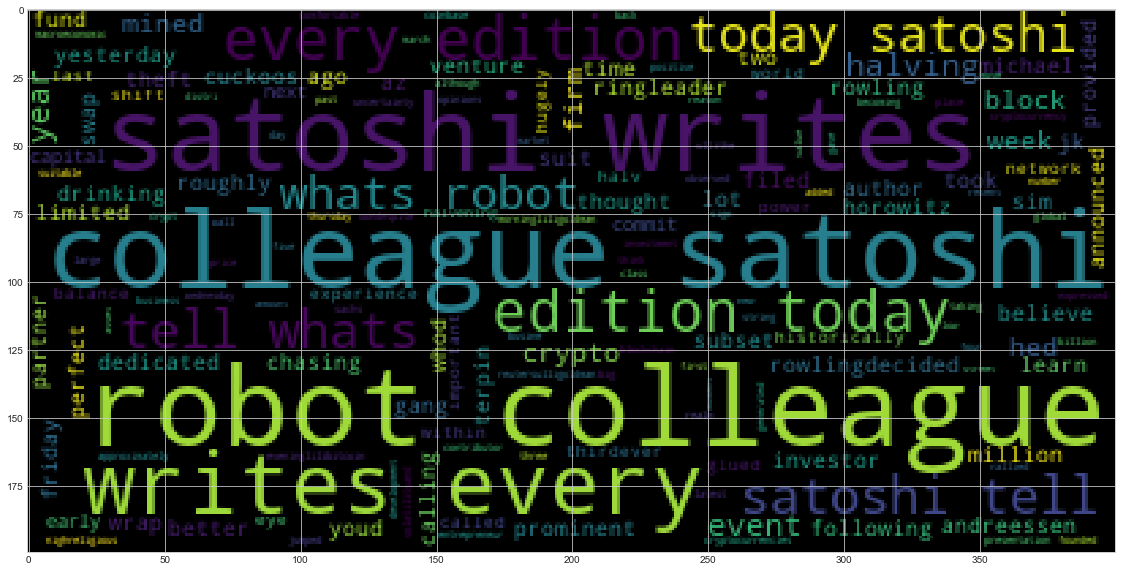

In [258]:
# Generate the Bitcoin word cloud
def process_text(doc):
    sw = set(stopwords.words('english'))
    sw = sw.union(sw_addons)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(btc_big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

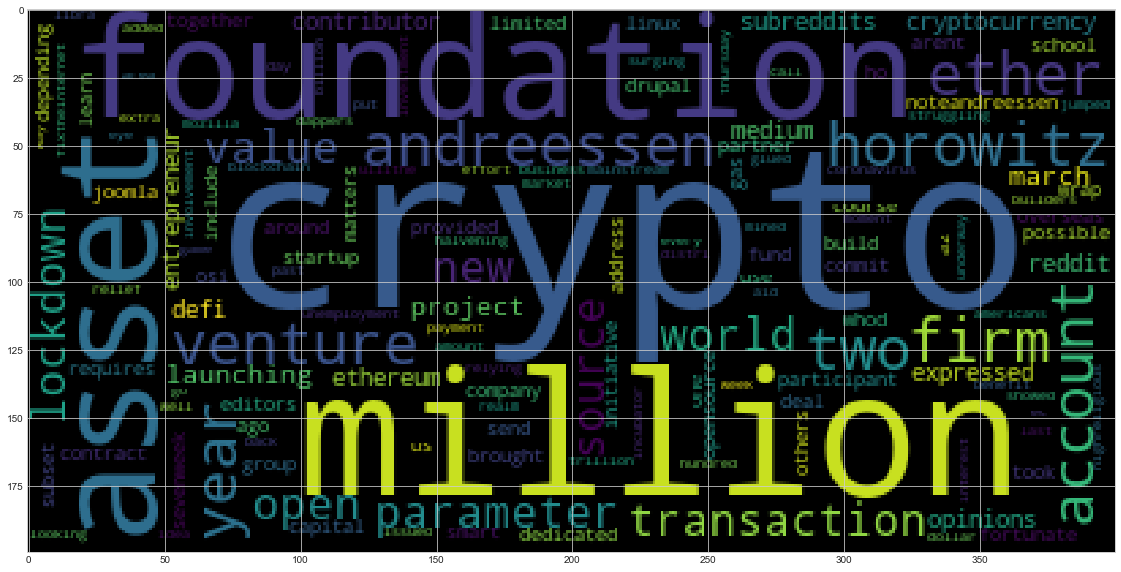

In [259]:
# Generate the Ethereum word cloud
def process_text(doc):
    sw = set(stopwords.words('english'))
    sw = sw.union(sw_addons)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(eth_big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [261]:
import spacy
from spacy import displacy

In [262]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [263]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [264]:
# Concatenate all of the bitcoin text together
# already done above, btc_big_string

In [272]:
# Run the NER processor on all of the text
btc = nlp(btc_big_string)
# Add a title to the document
btc.user_data['title'] = "Bitcoin NER"

In [273]:
# Render the visualization
displacy.render(btc, style='ent')

In [267]:
# List all Entities
print([ent.text for ent in btc.ents])

['J.K. Rowling', 'Bitcoin', 'The Cuckoos Calling', 'Friday', 'Yesterday', 'Michael Terpin', 'SIM', '2018', 'Two years ago', 'Andreessen Horowitz', 'a16z', '$300 million', 'Early next week', 'Bitcoin', 'third', 'the last few weeks', 'blockchain', 'new bitcoin', 'first', 'Bitcoin', '2009', 'three', '210,000', 'every four years', 'Bitcoin', '$13 billion', 'the past day', 'bitcoin', 'more than 6%', 'Thursday', 'Bitcoin', 'more than 100%', 'March 16', 'Reuters\r\n', 'Goldman Sachs', 'five', 'bitcoin', 'Wednesday', 'Goldman', '2012', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', '2020', 'a big year', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bi

---

## Ethereum NER

In [268]:
# Concatenate all of the ethereum text together
# already done above, eth_big_string

In [274]:
# Run the NER processor on all of the text
eth = nlp(eth_big_string)
# Add a title to the document
eth.user_data['title'] = "Ethereum NER"

In [275]:
# Render the visualization
displacy.render(eth, style='ent')

In [271]:
# List all Entities
print([ent.text for ent in eth.ents])

['Andreessen', 'Crypto Startup School', '45', 'U.S.', 'seven-week', 'Andreessen Ho', 'Two years ago', 'Andreessen Horowitz', 'a16z', '$300 million', 'one', 'The Linux Foundation', 'Drupal Foundation', 'OSI', 'millions', 'Americans', '$2 trillion dollar', 'Relief', 'Ec', 'the last few weeks', 'blockchain', 'new bitcoin', 'crypto', 'Dapper', 'Libra', 'March', '1500', 'well over a hundred', 'the Mozilla Builders Incubator', '$13 billion', 'the past day', 'bitcoin', 'more than 6%', 'Thursday', 'Bitcoin', 'more than 100%', 'March 16', 'Kevin Owocki', 'Frank Chen', '5', 'Gitcoin Grants', '250,000', '2020', 'a big year', 'Bitcoin', 'today', '27', 'Java', 'CoinDesk', 'Nolan Baurle', "the Ethereum Foundation's", 'Hudson Jameson', 'Lockdown Ed', 'Bitcoin', 'Ether', 'DeFi', 'Two', '2.4 million', 'the r/Cryptocurrency', 'un']
